64


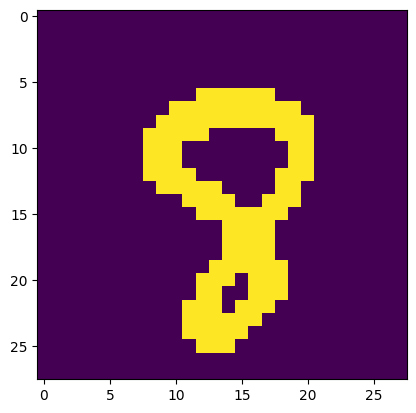

In [7]:
# you need these imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from time import sleep
from IPython import display

t = 1000
p = np.linspace(0,1,t)
fy = stats.beta.pdf(p, a=1, b=1)

def update(fy: np.array, n:bool) -> np.array:
    p = np.linspace(0,1,t)
    # calculate P(N = n| Y = p) which is a bernouli distribution
    # calculate integral(0 -> 1) fy * pny
    pny = stats.bernoulli.pmf(n, p)
    integral = np.sum(fy * pny) / t
    post = fy * pny / integral
    return post


#my code part 1 to 3
df = pd.read_csv("digits.csv")
df = pd.DataFrame(df)
row_201 = df.iloc[200]
row_202 = df.iloc[201]
df.drop(200,axis=0, inplace=True)
df.drop(201,axis=0, inplace=True)
binary_data = df.copy()
binary_data[df.iloc[:, df.columns != 'label'] >= 128] = 1
binary_data[df.iloc[:, df.columns != 'label'] < 128] = 0
random_number = np.random.randint(0, 200)
array1 = np.array(binary_data.iloc[random_number, 1:])
array2 = np.reshape(array1, (28,28))
print(random_number)
plt.imshow(array2)

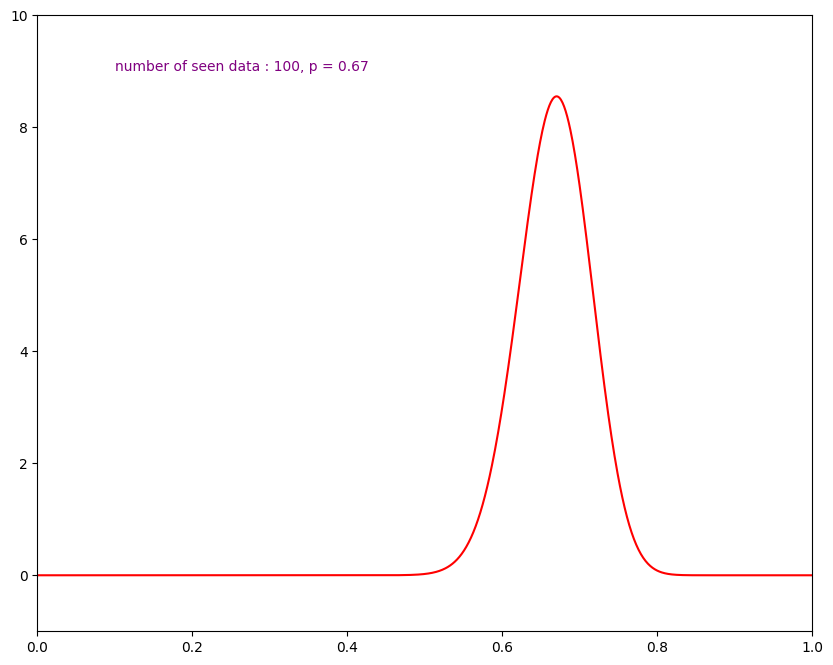

<Figure size 1000x800 with 0 Axes>

In [8]:
plt.figure(figsize=(10,8))
for i in range(100):
    # replace 'df' with your dataframe's name, this is just a suggestion, you do not have to code exactly like this
    n =  binary_data[binary_data['label'] == 8].iloc[i, binary_data.columns.get_loc('pixel404')]
    fy = update(fy, n)

    # dynamic plot
    # do not change this part
    plt.plot(p, fy, 'r', label='1')
    plt.ylim(-1, 10)
    plt.xlim(0, 1)
    plt.text(0.1,9,f'number of seen data : {i + 1}, p = {fy.argmax() / t :.2f}', color='purple')
    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.clf()
    sleep(0.05)